In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

## DecisionTreeClassifier 基础

In [3]:
iris = load_iris()
X = iris.data[:,2:]
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## 决策边界展示

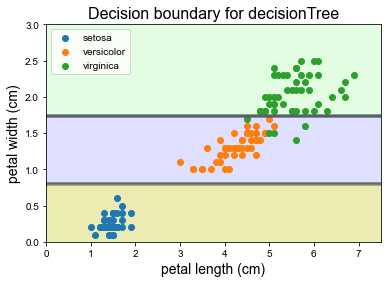

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, feature_names, target_names=None,
                           axis=[0, 7.5, 0, 3],legend=True, plot_training=True):
    custom_cmap = ListedColormap(['y','#9898ff','#a0faa0'])
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#505d50'])
    
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    #print(x1.shape)
    
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    
    if plot_training:
        for index,name in enumerate(target_names):
            plt.scatter(X[:,0][y==index], X[:,1][y==index],label=name)
    if legend:
        plt.legend()
            
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision boundary for decisionTree')


plot_decision_boundary(tree_clf, X, y, iris.feature_names[2:], 
                       iris.target_names, [0, 7.5, 0, 3],
                       True, True)
plt.show()
    

## 概率估计

In [6]:
tree_clf.predict_proba([[1,1.5],[5,1.5],[5,2.0]])

array([[0.        , 0.90740741, 0.09259259],
       [0.        , 0.90740741, 0.09259259],
       [0.        , 0.02173913, 0.97826087]])

## 预剪枝的作用
max_leaf_nodes  
min_samples_split  
min_samples_leaf  
max_features  
max_leaf_nodes  

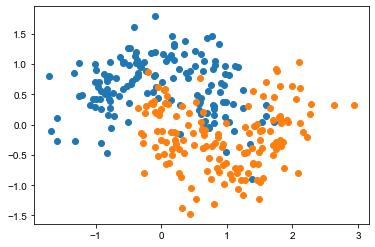

In [7]:
# 创建数据
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 300, noise = 0.35, random_state=0)
plt.scatter(X[:,0][y==0],X[:,1][y==0])
plt.scatter(X[:,0][y==1],X[:,1][y==1])
plt.show()

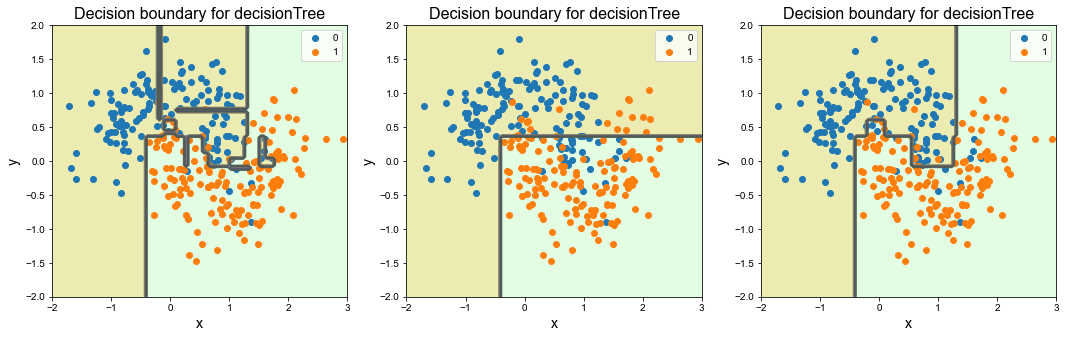

In [8]:
plt.figure(figsize=(18,5))
plt.subplot(131)
tree_clf1 = DecisionTreeClassifier()
tree_clf1.fit(X,y)
plot_decision_boundary(tree_clf1, X, y, ['x','y'], set(y) ,[-2, 3, -2, 2],
                       True, True) 

plt.subplot(132)
tree_clf2 = DecisionTreeClassifier(max_leaf_nodes=3, 
                                   max_depth=2)
tree_clf2.fit(X,y)
plot_decision_boundary(tree_clf2, X, y, ['x','y'], set(y) ,[-2, 3, -2, 2],
                       True, True) 

plt.subplot(133)
tree_clf3 = DecisionTreeClassifier(min_samples_split=6,
                                   min_samples_leaf=2,
                                   max_leaf_nodes=10,
                                   max_depth=5)
tree_clf3.fit(X,y)
plot_decision_boundary(tree_clf3, X, y, ['x','y'], set(y) ,[-2, 3, -2, 2],
                       True, True)
plt.show()

## 回归

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(rng.rand(100,1),axis=0) * 7
y = np.sin(X).ravel()

In [22]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,y)

DecisionTreeRegressor()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


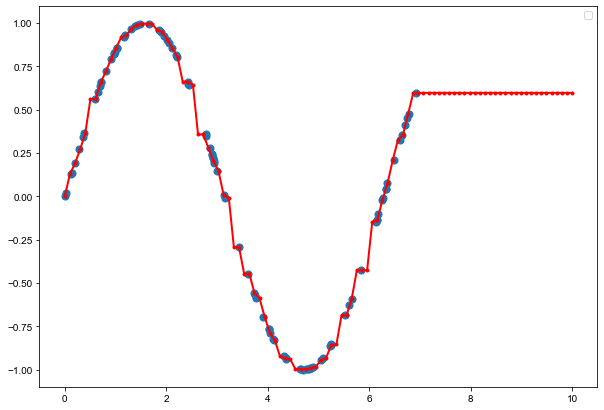

In [47]:
# defint plot function
def plot_reg_pred(clf, X, y, axis=[0,10,0,10], xlabel="x", ylabel="y", legend=True):
    
    x_dec = np.linspace(axis[0],axis[1],100).reshape(-1,1)
    #print(x_dec)
    y_dec = clf.predict(x_dec)
    plt.scatter(X,y,s=50)
    plt.plot(x_dec,y_dec,'r.-', linewidth=2)
    
    plt.axis = axis
    plt.xlabel = xlabel
    plt.ylabel = ylabel
    if legend:
        plt.legend()

def plot_reg_pred_compare(clfs, X, y, legend_names=None ,axis=[0,10,0,10], xlabel="x", ylabel="y", legend=True):
    
    x_dec = np.linspace(axis[0],axis[1],100).reshape(-1,1)
    plt.scatter(X,y,s=50)
    total_clf = len(clfs)
    
    for index,clf in enumerate(clfs):
        y_dec = clf.predict(x_dec)
        plt.plot(x_dec,y_dec,linewidth=3,label=legend_names[index])
    
    plt.axis = axis
    plt.xlabel = xlabel
    plt.ylabel = ylabel
    if legend:
        plt.legend()

plt.figure(figsize=(10,7))
plot_reg_pred(tree_reg, X, y)
plt.show()

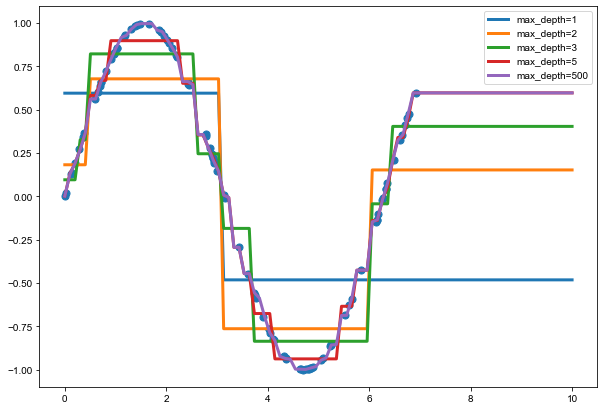

In [51]:
# compare for different max_depth
max_depth_list = [1,2,3,5,500]
clfs = [DecisionTreeRegressor(max_depth=depth) for depth in max_depth_list]
for clf in clfs:
    clf.fit(X,y)
legend_names = [f"max_depth={i}" for i in max_depth_list]
plt.figure(figsize=(10,7))
plot_reg_pred_compare(clfs, X, y, legend_names)
plt.show()